In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


## Loading + inspecting the data

In [2]:
digits = load_digits()
print(digits.data.shape)
(1797, 64)

(1797, 64)


(1797, 64)

In [3]:
#digits

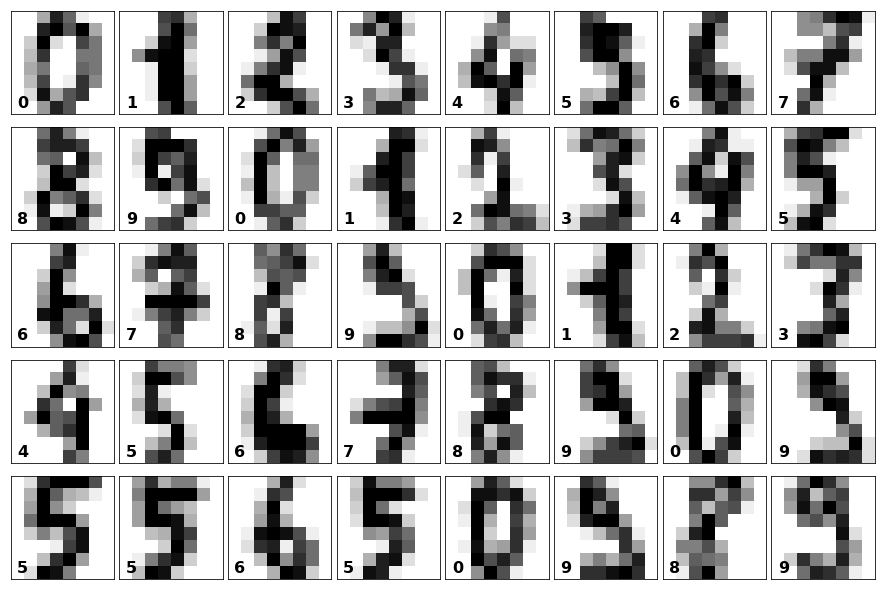

In [4]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), fontsize = 16, fontweight = 'bold')

In [5]:
digits.target[0:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [6]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [7]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

### Split data into training and test sets

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(digits.data, digits.target, test_size = 0.80, random_state = 123)

# -------------------------------------------------------------------------------------

# SVC Model

In [30]:
#flatten the image, to turn the data in a (samples, feature) matrix:
n_samples_train = len(train_images)
train_images_flattened = train_images.reshape((n_samples_train, -1))
n_samples_test = len(test_images)
test_images_flattened = test_images.reshape((n_samples_test, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001, random_state=123)

# Train data
classifier.fit(train_images_flattened, train_labels)

#actual labels for test data set
expected = test_labels

#Use trained model to predict labels for test data
predicted = classifier.predict(test_images_flattened)

print("Training set score: %f" % classifier.score(train_images, train_labels))
print("Test set score: %f" % classifier.score(test_images, test_labels))
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))
print("Accuracy = ", accuracy_score(expected, predicted))

Training set score: 1.000000
Test set score: 0.973574
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       154
          1       0.95      1.00      0.97       147
          2       1.00      0.97      0.99       145
          3       0.98      0.97      0.97       143
          4       0.98      0.97      0.97       152
          5       0.99      0.96      0.98       140
          6       0.97      1.00      0.98       143
          7       0.97      1.00      0.98       146
          8       0.94      0.94      0.94       131
          9       0.96      0.96      0.96       137

avg / total       0.97      0.97      0.97      1438


Confusion matrix:
[[149   0   0   0   2   0  

## Visualize first 40 results

### Yellow signifies a correct prediction and red signifies an incorrect prediction

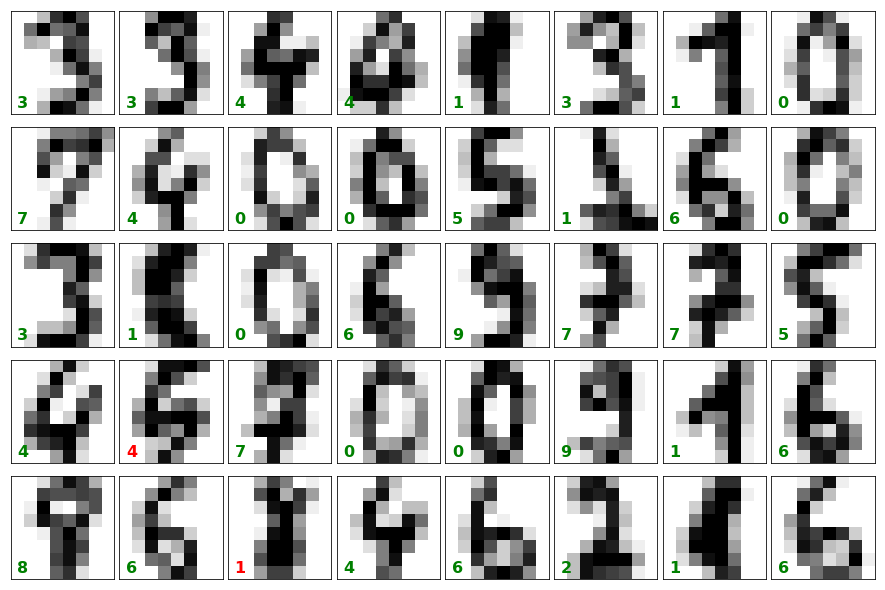

In [31]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted[i] == expected[i]:
        font_col = "green"
    else:
        font_col = "red"
    ax.text(0, 7, str(predicted[i]), color=font_col, fontsize = 16, fontweight = 'bold')

## Deeper look into incorrect visualizations

### We have included the true actual classes for the first 40 incorrect predictions

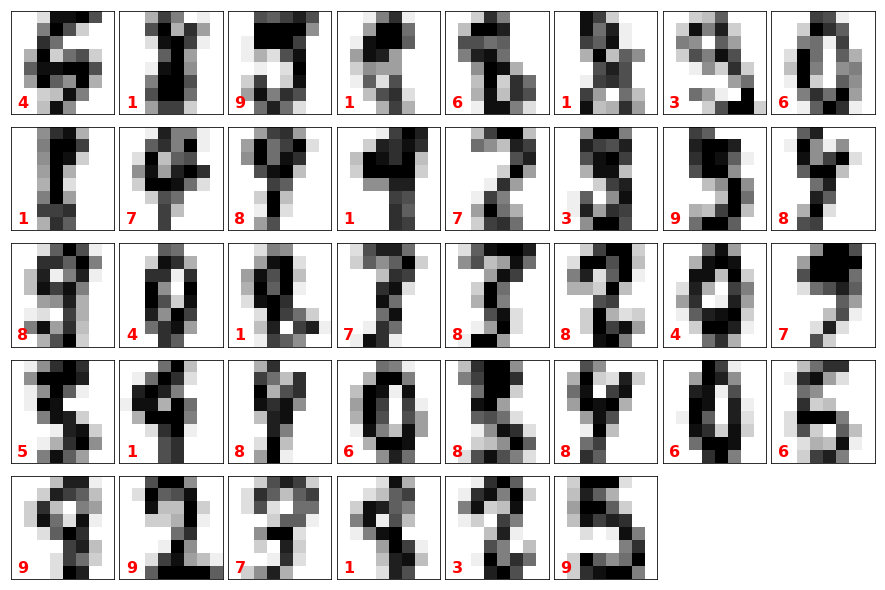

In [11]:
incorrectly_classified = []
for n in range(len(expected)):
    if predicted[n] != expected[n]:
        incorrectly_classified.append(n)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(38):
    j = incorrectly_classified[i]
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[j], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(predicted[j]), color="red", fontsize = 16, fontweight = 'bold')

# -----------------------------------------------------------------------------------

# Multilayer Perceptron

In [12]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', hidden_layer_sizes=(800),
       learning_rate_init=0.01, max_iter=200, random_state=123, shuffle=True,
       solver='sgd', tol=1e-05, validation_fraction=0.2, verbose=False)

mlp.fit(train_images, train_labels)
predicted = mlp.predict(test_images)
expected = test_labels
print("Training set score: %f" % mlp.score(train_images, train_labels))
print("Test set score: %f" % mlp.score(test_images, test_labels))
print("Classification report for classifier %s:\n%s\n"
      % (mlp, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))
print("Accuracy = ", accuracy_score(expected, predicted))

Training set score: 1.000000
Test set score: 0.955494
Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=800, learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='sgd', tol=1e-05, validation_fraction=0.2,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      0.94      0.97       154
          1       0.88      0.99      0.93       147
          2       1.00      0.93      0.96       145
          3       0.93      0.97      0.95       143
          4       0.98      0.97      0.97       152
          5       0.97      0.95      0.96       140
          6       0.93      0.99      0.96       143
          7       0.99      1.00      0.99       146
   

### Loss curve for MLP

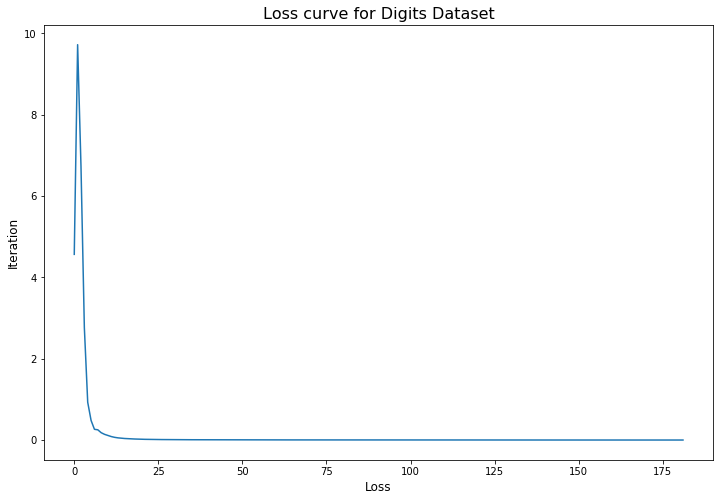

In [13]:
figure(figsize=(12, 8))
plot(mlp.loss_curve_)
title("Loss curve for Digits Dataset", fontsize=16)
xlabel("Loss", fontsize = 12)
ylabel("Iteration", fontsize = 12)
show()

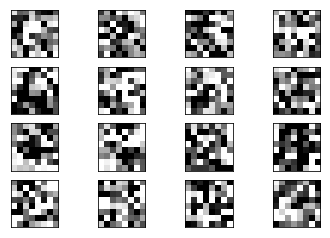

In [14]:
#Vizualization of the MLP weights
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.25 * vmin,
               vmax=.25 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

### Plotting the first 4 digits with their respective labels (red = incorrect)

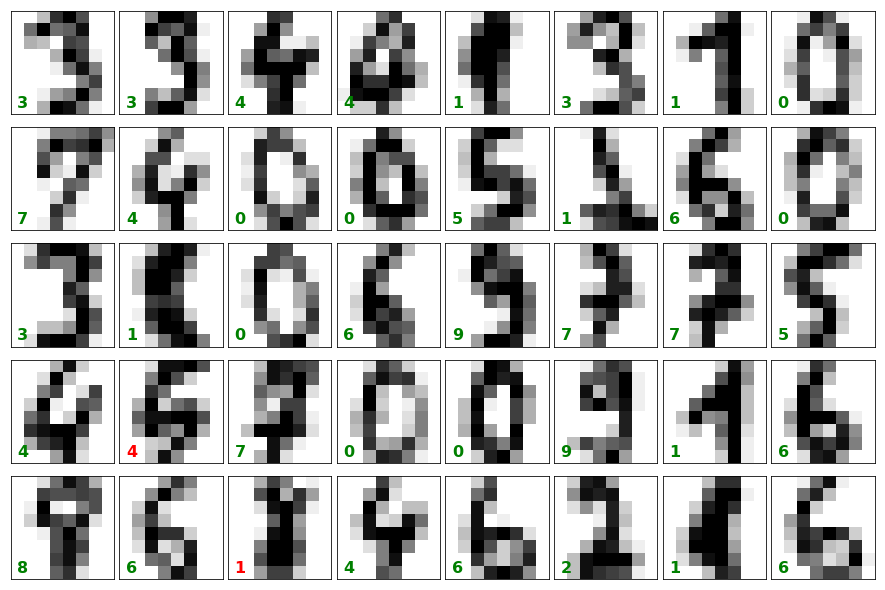

In [15]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted[i] == expected[i]:
        font_col = "green"
    else:
        font_col = "red"
    ax.text(0, 7, str(predicted[i]), color=font_col, fontsize = 16, fontweight = 'bold')

### Plotting the incorrectly classified digits:

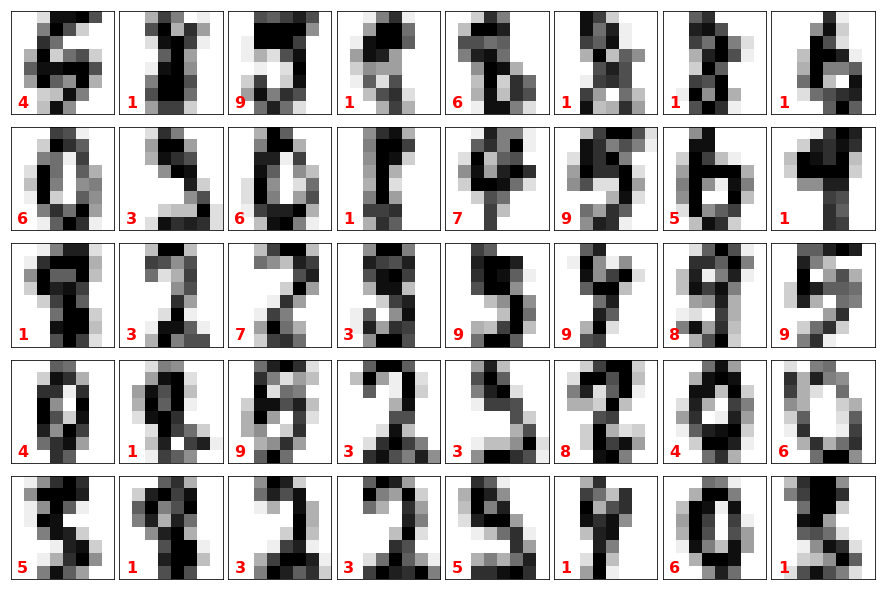

In [16]:
incorrectly_classified = []
for n in range(len(expected)):
    if predicted[n] != expected[n]:
        incorrectly_classified.append(n)
        
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    j = incorrectly_classified[i]
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[j], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(predicted[j]), color="red", fontsize = 16, fontweight = 'bold')

In [17]:
#Scaling the train and test data:
data_scaler = StandardScaler()
data_scaler.fit(train_images)
train_images_scaled = data_scaler.transform(train_images)
test_images_scaled = data_scaler.transform(test_images)

In [18]:
mlp_scaled = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', hidden_layer_sizes=(800),
       learning_rate_init=0.01, max_iter=200, random_state=123, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.2, verbose=False)

mlp_scaled.fit(train_images_scaled, train_labels)
y_scaled_predicted = mlp_scaled.predict(test_images_scaled)
print("Training set score: %f" % mlp_scaled.score(train_images_scaled, train_labels))
print("Test set score: %f" % mlp_scaled.score(test_images_scaled, test_labels))
print("Classification report for classifier %s:\n%s\n"
      % (mlp_scaled, classification_report(expected, y_scaled_predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, y_scaled_predicted))
print("Accuracy = ", accuracy_score(expected, y_scaled_predicted))

Training set score: 1.000000
Test set score: 0.946453
Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=800, learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=1e-05, validation_fraction=0.2,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.99      0.92      0.96       154
          1       0.92      0.98      0.95       147
          2       1.00      0.94      0.97       145
          3       0.91      0.94      0.92       143
          4       0.97      0.96      0.97       152
          5       0.98      0.96      0.97       140
          6       0.90      0.99      0.94       143
          7       0.97      1.00      0.99       146
  

### Loss curve for MLP (scaled data)

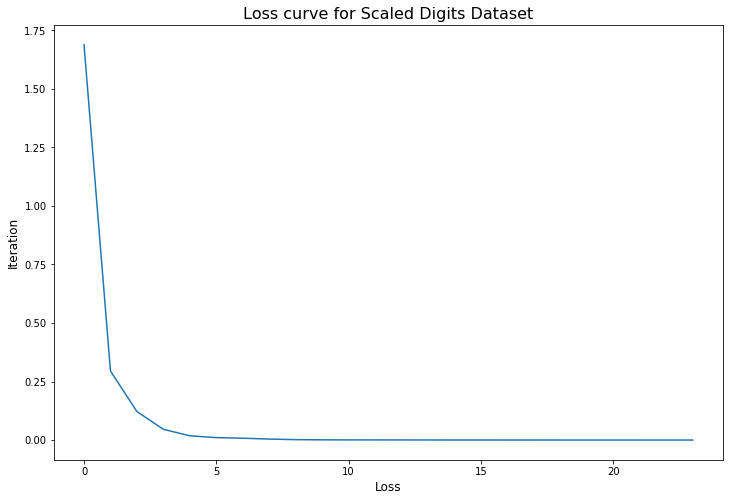

In [19]:
figure(figsize=(12, 8))
plot(mlp_scaled.loss_curve_)
title("Loss curve for Scaled Digits Dataset", fontsize=16)
xlabel("Loss", fontsize = 12)
ylabel("Iteration", fontsize = 12)
show()

### Plotting the first 4 digits with their respective labels (red = incorrect)

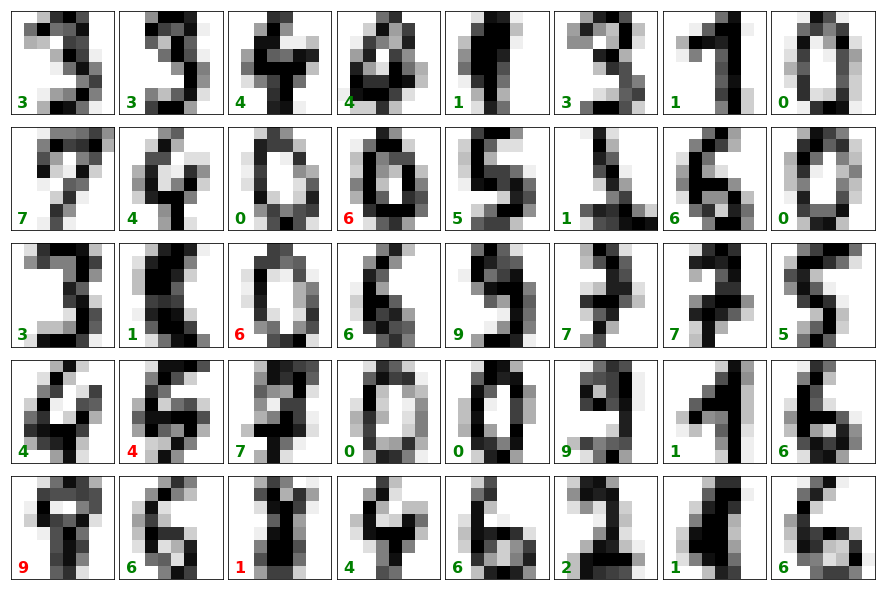

In [20]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
    if y_scaled_predicted[i] == test_labels[i]:
        font_col = "green"
    else:
        font_col = "red"
    ax.text(0, 7, str(y_scaled_predicted[i]), color=font_col, fontsize = 16, fontweight = 'bold')

### Plotting the incorrectly classified digits:

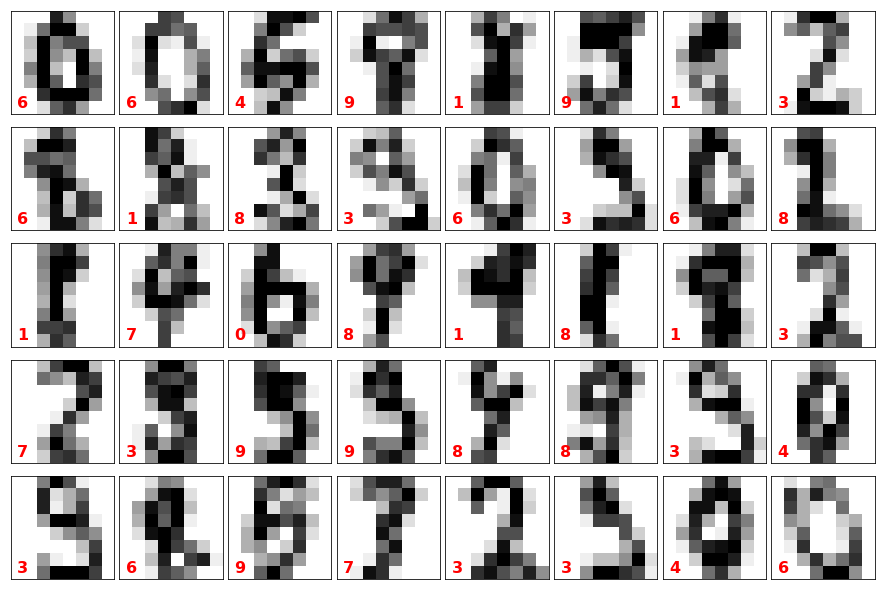

In [21]:
incorrectly_classified = []
for n in range(len(test_labels)):
    if y_scaled_predicted[n] != test_labels[n]:
        incorrectly_classified.append(n)
        
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    j = incorrectly_classified[i]
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[j], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(y_scaled_predicted[j]), color="red", fontsize = 16, fontweight = 'bold')

# -----------------------------------------------------------------------------------------

# K-Nearest Neighbor

In [29]:
accuracy_scores = []
for k in range(1, 25, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_images, train_labels)
    score = knn_model.score(test_images, test_labels)
    accuracy_scores.append(score)
print("Optimal value for k: {}".format(range(1, 50, 2)[np.argmax(accuracy_scores)]))

Optimal value for k: 5


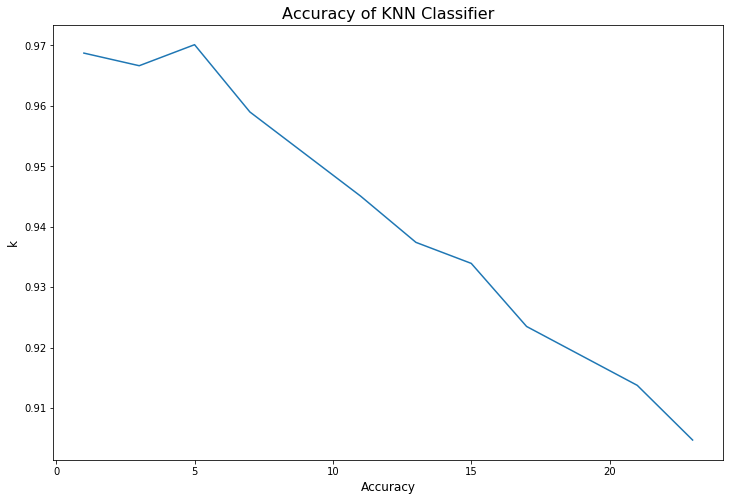

In [23]:
figure(figsize=(12, 8))
plot(range(1, 25, 2), accuracy_scores)
title("Accuracy of KNN Classifier", fontsize=16)
xlabel("Accuracy", fontsize = 12)
ylabel("k", fontsize = 12)
show()

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_images, train_labels)
predicted = knn_model.predict(test_images)
expected = test_labels
print("Training set score: %f" % knn_model.score(train_images, train_labels))
print("Test set score: %f" % knn_model.score(test_images, test_labels))
print("Classification report for classifier %s:\n%s\n"
      % (knn_model, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))
print("Accuracy = ", accuracy_score(expected, predicted))

Training set score: 0.980501
Test set score: 0.970097
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       154
          1       0.92      1.00      0.96       147
          2       0.99      0.96      0.98       145
          3       0.95      0.97      0.96       143
          4       0.98      0.98      0.98       152
          5       0.99      0.96      0.97       140
          6       1.00      1.00      1.00       143
          7       0.96      1.00      0.98       146
          8       0.94      0.90      0.92       131
          9       0.97      0.92      0.94       137

avg / total       0.97      0.97      0.97      1438


Confusion matrix:
[[153   0   0   0   1   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]


### Plotting the first 4 digits with their respective labels (red = incorrect)

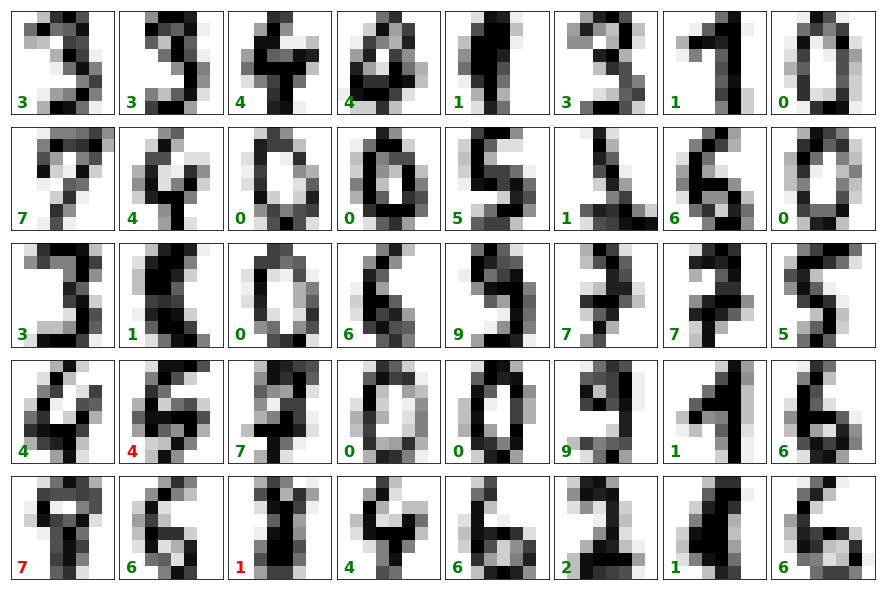

In [25]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted[i] == expected[i]:
        font_col = "green"
    else:
        font_col = "red"
    ax.text(0, 7, str(predicted[i]), color=font_col, fontsize = 16, fontweight = 'bold')

### Plotting the incorrectly classified digits:

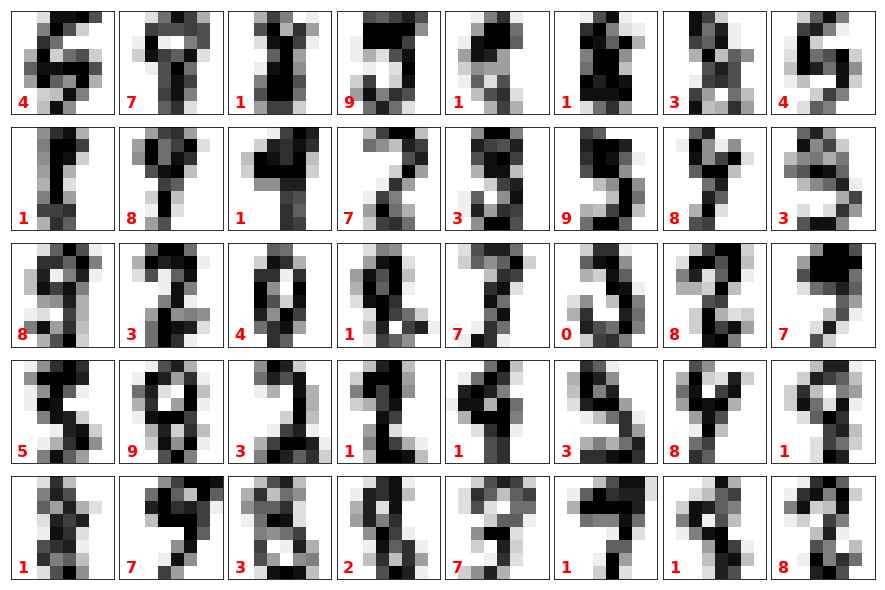

In [26]:
incorrectly_classified = []
for n in range(len(expected)):
    if predicted[n] != expected[n]:
        incorrectly_classified.append(n)
        
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(40):
    j = incorrectly_classified[i]
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images.reshape(-1, 8, 8)[j], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(predicted[j]), color="red", fontsize = 16, fontweight = 'bold')